In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Read the dataset
data = pd.read_csv("sample_data/california_housing_train.csv")
df = pd.DataFrame({'x1': data['housing_median_age'], 'x2': data['total_rooms'], 'x3': data['total_bedrooms'], 'x4': data['median_income'], 'y':data['median_house_value']})
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


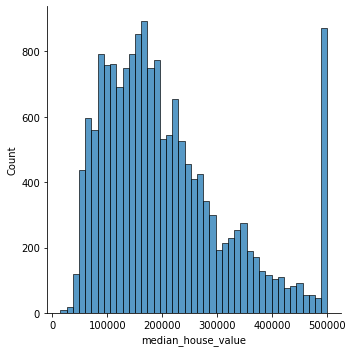

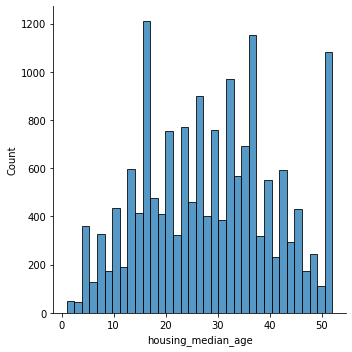

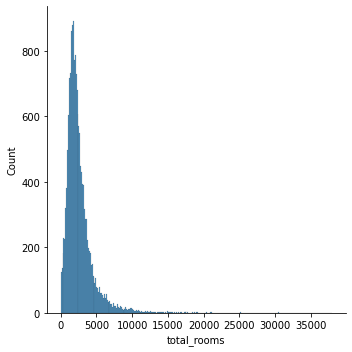

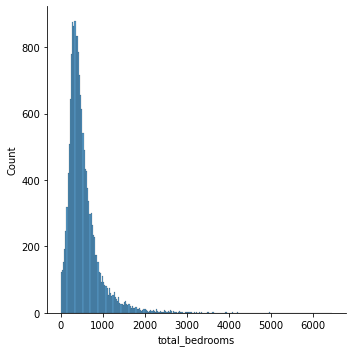

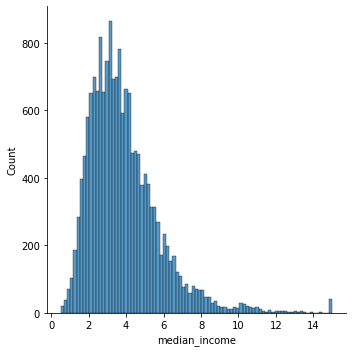

In [ ]:
sns.displot(data['median_house_value'])
sns.displot(data['housing_median_age'])
sns.displot(data['total_rooms'])
sns.displot(data['total_bedrooms'])
sns.displot(data['median_income'])

In [ ]:
data['housing_median_age'].isnull().sum()
for i in ['housing_median_age']:
  q75,q25 = np.percentile(data.loc[:, i], [62,38])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  data.loc[data[i] < min,i] = np.nan
  data.loc[data[i] > max,i] = np.nan


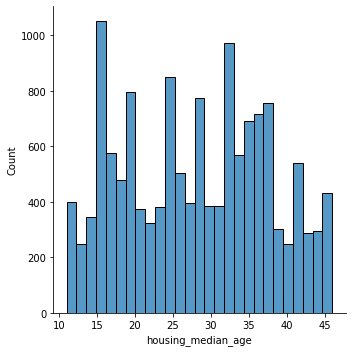

In [ ]:

data['housing_median_age'].isnull().sum()
data = data.dropna(axis = 0)
sns.displot(data['housing_median_age'])


In [ ]:
# Split dataset
training_df = df.iloc[:(int((len(df)*0.8))), :]
testing_df = df.iloc[(int((len(df)*0.8))):, :]

# Calculate coefficients using gradient descent
X_train = training_df[['x1', 'x2', 'x3', 'x4']]
y_train = training_df['y']

# Tambahkan satu kolom bernilai 1 pada data X_training supaya bari dan kolom antara X dan y sama, sehingga bisa di kalikan  
X_train = np.c_[np.ones(len(X_train)), X_train]

# beri nilai awal theta yaitu 0
theta = np.zeros(X_train.shape[1])
print(theta)

# tentukan alpha (learning rate), karena datanya banyak, alphanya kecil
alpha = 0.0000001

# tentukan banyak data training, disimpan di m, banyak iterasi (num_iters)
m = len(y_train)
print(m)
num_iters = 100000

# buat array untuk menyimpan perubahan nilai cost overtime
J_history = []

[0. 0. 0. 0. 0.]
13600


In [ ]:
# hitung theta sebanyak num_iters kali
for i in range(num_iters):

  # mencari data prediksi dengan rumus regresi
  y_pred = X_train @ theta

  # mencari error dari selisih data prediksi dengan data asli
  error = y_pred - y_train

  # rumus cost function
  cost = 1/(2*m) * np.sum(error**2)
  J_history.append(cost)

  # rumus gradient descent untuk multivariate menggunakan numpy
  gradient = 1/m * X_train.T @ error

  # update theta terbaru 
  theta = theta - alpha * gradient

# TEST SET
# Use the coefficients to make predictions on the test set
# rumus regresi multivariate adalah perkalian matirks X_test dengan matriks bersi theta/koefisien regresi
X_test = testing_df[['x1', 'x2', 'x3', 'x4']]

# supaya matriks bisa dikalikan, jumlah kolom X dengan jumlah bari Y harus sama. Sehingga ditambah 1 kolom bernilai angka 1 dimatriks y.
X_test = np.c_[np.ones(len(X_test)), X_test]
y_pred = X_test @ theta
y_test = testing_df['y']

# Calculate mean squared error as a metric
mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

# Plot the cost function over the number of iterations
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()


KeyboardInterrupt: ignored

In [ ]:
# NO 1
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = "3d")

# Creating plot
ax.scatter3D(testing_df['x1'], testing_df['x2'], y_pred, color = "red", s = 1)
ax.scatter3D(testing_df['x1'], testing_df['x2'], y_test, color = "green", s = 1)

plt.title("Actual y (green), predictied y (red)")

plt.show()
print("          ")
# berbagai plot relasi antara x1, x2, x3, x4 dengan y
plt.scatter(testing_df['x1'], y_test, color="blue", s = 1)
plt.scatter(testing_df['x1'], y_pred, color="yellow", s = 1)
plt.title("X1 terhadap y")
plt.show()
print("          ")

plt.scatter(testing_df['x2'], y_test, color="blue", s = 1)
plt.scatter(testing_df['x2'], y_pred, color="yellow", s = 1)
plt.title("X2 terhadap y")
plt.show()
print("          ")

plt.scatter(testing_df['x3'], y_test, color="blue", s = 1)
plt.scatter(testing_df['x3'], y_pred, color="yellow", s = 1)
plt.title("X3 terhadap y")
plt.show()
print("          ")

plt.scatter(testing_df['x4'], y_test, color="blue", s = 1)
plt.scatter(testing_df['x4'], y_pred, color="yellow", s = 1)
plt.title("X4 terhadap y")
plt.show()

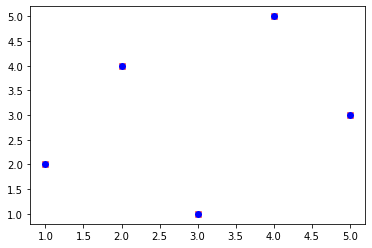

In [2]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

plt.scatter(x, y, c='red', marker='x')
plt.scatter(x, y, c='blue', marker='o')

plt.show()
